<a href="https://colab.research.google.com/github/Meitalg88/MyColabNotebooks/blob/main/Copy_of_%D7%9E%D7%95%D7%93%D7%9C_%D7%A4%D7%A9%D7%95%D7%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" style="text-align: right; line-height: 1.5;">

# כל המידע על BLOODMNIST

In [ ]:
import medmnist
from medmnist import INFO
from torchvision import transforms
from torch.utils.data import DataLoader

# בוחרים את המידע על הדאטה סט BloodMNIST
dataset_name = "bloodmnist"
info = INFO[dataset_name]
classes = info["label"]  # רשימת התוויות

# מדפיסים מידע על הדאטה סט
print(f"Dataset Name: {dataset_name}")
print(f"Number of Classes: {len(classes)}")
print("Class Labels:")
for key, value in classes.items():
    print(f"Class {key}: {value}")

# טוענים את הדאטה סט
DataClass = getattr(medmnist, info["python_class"])
transform = transforms.ToTensor()
train_dataset = DataClass(split="train", transform=transform, download=True)
test_dataset = DataClass(split="test", transform=transform, download=True)

# הצגת כמות הדוגמאות בכל סט
print(f"\nNumber of training examples: {len(train_dataset)}")
print(f"Number of test examples: {len(test_dataset)}")

# הדפסת דוגמה ראשונה עם התווית שלה
example_image, example_label = train_dataset[0]
print(f"\nExample Image Shape: {example_image.shape}")
print(f"Example Label: {example_label}")

In [ ]:
import matplotlib.pyplot as plt
from medmnist import BloodMNIST

# Load dataset
data_train = BloodMNIST(split='train', download=True)

# Initialize storage for one image per class
class_images = {}

# Iterate over the dataset to collect one image per class
for img, label in zip(data_train.imgs, data_train.labels.flatten()):
    label = int(label)
    if label not in class_images:
        class_images[label] = img
    if len(class_images) == 8:  # Stop when we have all 8 classes
        break

# Plot images
plt.figure(figsize=(15, 8))
for i, (label, img) in enumerate(sorted(class_images.items())):
    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Class {label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


<div dir="rtl" style="text-align: right; line-height: 1.5;">

#מודל CNN בסיסי

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Train Dataset Size: 11959
Validation Dataset Size: 1712
Test Dataset Size: 3421
Epoch 1/50, Loss: 0.7663, Validation Loss: 0.4160, Validation Accuracy: 0.8505
Epoch 2/50, Loss: 0.4020, Validation Loss: 0.3274, Validation Accuracy: 0.8814
Epoch 3/50, Loss: 0.3297, Validation Loss: 0.2984, Validation Accuracy: 0.8937
Epoch 4/50, Loss: 0.2810, Validation Loss: 0.3098, Validation Accuracy: 0.8797
Epoch 5/50, Loss: 0.2506, Validation Loss: 0.2759, Validation Accuracy: 0.8995
Epoch 6/50, Loss: 0.2079, Validation Loss: 0.2722, Validation Accuracy: 0.9019
Epoch 7/50, Loss: 0.1757, Validation Loss: 0.2815, Validation Accuracy: 0.8984
Epoch 8/50, Loss: 0.1591, Validation Loss: 0.2388, Validation Accuracy: 0.9141
Epoch 9/50, Loss: 0.1315, Validation Loss: 0.2588, Validation Accuracy: 0.9124
Epoch 10

<ipython-input-4-98d9acb5f5a5>:157: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Overall Metrics:
Test Accuracy: 0.9255
Precision (Weighted): 0.9270
Recall (Weighted): 0.9255
F1 Score (Weighted): 0.9255

Metrics Per Class:
              precision    recall  f1-score   support

     Class 0       0.91      0.78      0.84       244
     Class 1       0.98      0.98      0.98       624
     Class 2       0.97      0.89      0.93       311
     Class 3       0.83      0.87      0.85       579
     Class 4       0.90      0.91      0.91       243
     Class 5       0.82      0.88      0.85       284
     Class 6       0.95      0.96      0.96       666
     Class 7       1.00      1.00      1.00       470

    accuracy                           0.93      3421
   macro avg       0.92      0.91      0.91      3421
weighted avg       0.93      0.93      0.93      3421



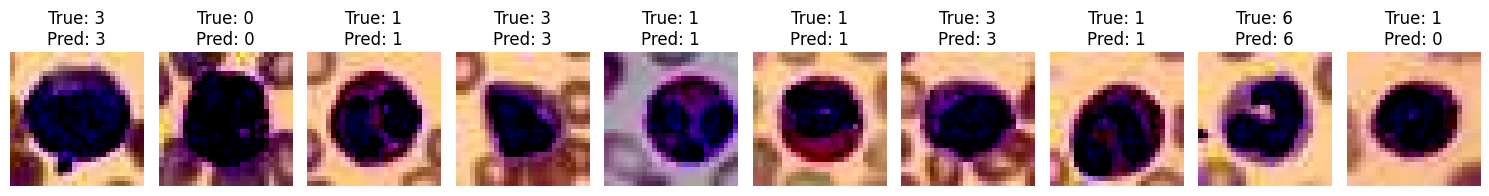

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from medmnist import INFO, BloodMNIST
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
info = INFO['bloodmnist']
data_train = BloodMNIST(split='train', download=True)
data_val = BloodMNIST(split='val', download=True)  # Use validation split
data_test = BloodMNIST(split='test', download=True)

# Preprocess data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = [(transform(img), label) for img, label in zip(data_train.imgs, data_train.labels.flatten())]
val_dataset = [(transform(img), label) for img, label in zip(data_val.imgs, data_val.labels.flatten())]
test_dataset = [(transform(img), label) for img, label in zip(data_test.imgs, data_test.labels.flatten())]

# Print dataset sizes
print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define model
class BloodDiseaseCNN(nn.Module):
    def __init__(self):
        super(BloodDiseaseCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 8)  # 8 classes in BloodMNIST

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss, and optimizer
model = BloodDiseaseCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with early stopping
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50, patience=5):
    best_val_loss = float('inf')
    no_improvement_epochs = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0
        val_preds = []
        val_labels = []
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(targets.cpu().numpy())

        val_loss /= len(val_loader)
        val_accuracy = accuracy_score(val_labels, val_preds)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improvement_epochs = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            no_improvement_epochs += 1
            if no_improvement_epochs >= patience:
                print("Early stopping triggered. No improvement for 5 epochs.")
                break

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer)

# Evaluate on test set with metrics
def evaluate_model_with_metrics(model, test_loader):
    model.eval()
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            test_preds.extend(preds.cpu().numpy())
            test_labels.extend(targets.cpu().numpy())

    # כללית - ממוצע משוקלל
    test_accuracy = accuracy_score(test_labels, test_preds)
    test_precision = precision_score(test_labels, test_preds, average='weighted')
    test_recall = recall_score(test_labels, test_preds, average='weighted')
    test_f1 = f1_score(test_labels, test_preds, average='weighted')

    print(f"Overall Metrics:")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision (Weighted): {test_precision:.4f}")
    print(f"Recall (Weighted): {test_recall:.4f}")
    print(f"F1 Score (Weighted): {test_f1:.4f}\n")

    # לפי תוויות
    print("Metrics Per Class:")
    report = classification_report(test_labels, test_preds, target_names=[f"Class {i}" for i in range(8)])
    print(report)

# Visualize predictions
def visualize_predictions(model, test_loader, num_samples=10):
    model.eval()
    inputs, labels = next(iter(test_loader))  # Get one batch
    outputs = model(inputs)  # Predictions
    _, preds = torch.max(outputs, 1)  # Predicted classes

    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(inputs[i].permute(1, 2, 0).cpu().numpy())
        plt.title(f"True: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load the best model and evaluate
model.load_state_dict(torch.load('best_model.pth'))
evaluate_model_with_metrics(model, test_loader)

# Visualize predictions
visualize_predictions(model, test_loader)



גרף

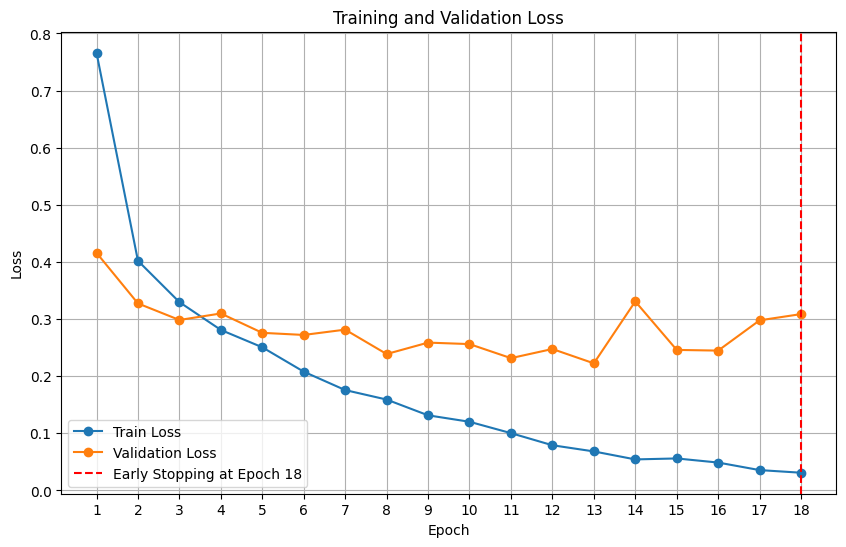

In [ ]:
import matplotlib.pyplot as plt

# רשימות ה-lossים
train_losses = [0.7663, 0.4020, 0.3297, 0.2810, 0.2506, 0.2079, 0.1757, 0.1591, 0.1315, 0.1202, 0.1003, 0.0791, 0.0683, 0.0543, 0.0560, 0.0488, 0.0356, 0.0310]
val_losses = [0.4160, 0.3274, 0.2984, 0.3098, 0.2759, 0.2722, 0.2815, 0.2388, 0.2588, 0.2562, 0.2316, 0.2476, 0.2225, 0.3309, 0.2460, 0.2448, 0.2978, 0.3087]
best_epoch = 17  # איפוק שבו בוצעה הפסקת האימון

# פונקציה לשרטוט הגרף
def plot_loss(train_losses, val_losses, best_epoch):
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(train_losses) + 1)  # ייצור רשימה עם מספרי האיפוקים
    plt.plot(epochs, train_losses, label='Train Loss', marker='o')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
    plt.axvline(best_epoch + 1, color='r', linestyle='--', label=f'Early Stopping at Epoch {best_epoch + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.xticks(epochs)  # הצגת מספרים שלמים על ציר ה-X
    plt.legend()
    plt.grid()
    plt.show()

# קריאה לפונקציה
plot_loss(train_losses, val_losses, best_epoch)

